In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('marketing_campaigns.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# Segmentation

In [3]:
segmented_df = df[['Education','Marital_Status','Response']]
# Calculate the acceptance rates for each segment
acceptance_rates = segmented_df.groupby(['Education', 'Marital_Status'])['Response'].mean() * 100

# Normalize the acceptance rates within each segment
segment_totals = acceptance_rates.groupby(level=0).transform('sum')
normalized_acceptance_rates = acceptance_rates / segment_totals * 100
normalized_acceptance_rates = normalized_acceptance_rates.round(2)

# Compare acceptance rates across segments
print(normalized_acceptance_rates)

Education   Marital_Status
2n Cycle    Divorced           40.94
            Married            18.60
            Single             30.54
            Together            9.91
            Widow               0.00
Basic       Divorced            0.00
            Married             0.00
            Single              0.00
            Together          100.00
            Widow               0.00
Graduation  Absurd             57.30
            Alone               0.00
            Divorced            9.15
            Married             5.69
            Single             11.82
            Together            6.21
            Widow               9.82
Master      Absurd              0.00
            Alone               0.00
            Divorced           14.43
            Married             9.67
            Single             21.35
            Together           10.07
            Widow              44.48
PhD         Alone              36.86
            Divorced           12.76
           

<b>Education Segment:</b>
<br>
Customers with a "Basic" education level who are "Together" have a 100% acceptance rate. This indicates that all customers in this specific segment accepted the offer.
<br>
Customers with a "2n Cycle" education level show relatively higher acceptance rates, with the highest rate seen among those who are "Divorced" (40.94%).
<br>
Customers with a "Graduation" education level have varying acceptance rates, ranging from 0% for those with an "Absurd" marital status to the highest rate among those who are "Absurd" (57.30%).
<br>
Customers with a "Master" education level have a significant acceptance rate among those who are "Widow" (44.48%).
<br>
<b>Marital Status Segment:</b>
<br>
Customers who are "Divorced" or "Single" show higher acceptance rates across different education levels.
<br>
Customers who are "Married" or "Together" generally have lower acceptance rates compared to other marital status categories.

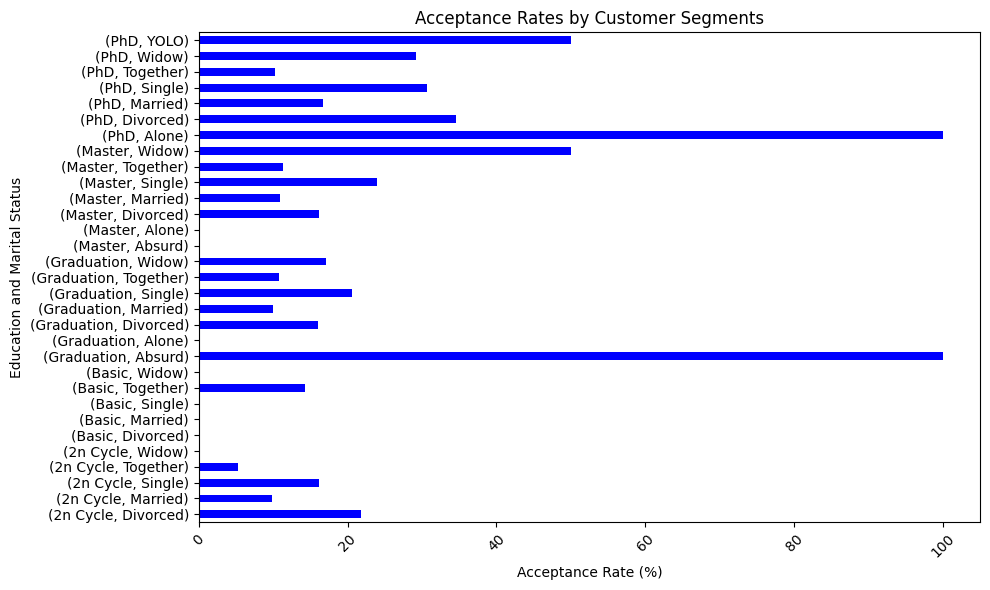

In [4]:
# Plot acceptance rates
plt.figure(figsize=(10, 6))
acceptance_rates.plot(kind='barh', color='blue')
plt.ylabel('Education and Marital Status')
plt.xlabel('Acceptance Rate (%)')
plt.title('Acceptance Rates by Customer Segments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

<b>Wines and Meat Preferences</b>

In [6]:
# Analyze wines and meat preferences within each segment
segmented_df['AmountSpentWines'] = df['MntWines']  
segmented_df['AmountSpentMeat'] = df['MntMeatProducts']

segment_preferences = segmented_df.groupby(['Education', 'Marital_Status']).agg({
    'AmountSpentWines': 'mean',
    'AmountSpentMeat': 'mean'
})
print(segment_preferences)

                           AmountSpentWines  AmountSpentMeat   
Education  Marital_Status                                      
2n Cycle   Divorced              351.173913       150.695652  \
           Married               154.777778       122.654321   
           Single                209.945946       177.405405   
           Together              188.421053       136.649123   
           Widow                 221.800000       184.200000   
Basic      Divorced                0.000000         3.000000   
           Married                15.200000        17.000000   
           Single                  3.111111         7.611111   
           Together                2.000000         8.142857   
           Widow                   3.000000        24.000000   
Graduation Absurd                471.000000       125.000000   
           Alone                   5.000000        24.000000   
           Divorced              300.579832       162.983193   
           Married               272.568

<b>Education Segment:</b>

<br>
Customers with a "2n Cycle" education level show varying preferences for spending on wines and meat products, with the highest amounts spent by those who are "Divorced" and "Single.
<br>
Customers with a "Basic" education level generally have lower spending on wines and meat products compared to other education levels. However, there are notable exceptions, such as "Married" customers who have relatively higher spending on both categories.
<br>
Customers with a "Graduation" or "Master" education level tend to have moderate spending on wines and meat products, with some variations based on marital status. Notably, customers who are "Widow" in the "Master" education segment have higher spending on both categories.
<br>

<b>Marital Status Segment:</b>
<br>
Customers who are "Divorced," "Single," or "Widow" across different education levels generally exhibit higher spending on wines and meat products compared to customers who are "Married" or "Together.
<br>
Customers who are "Married" or "Together" show a range of spending preferences, with some segments having moderate spending while others have relatively lower spending.

<Figure size 1000x600 with 0 Axes>

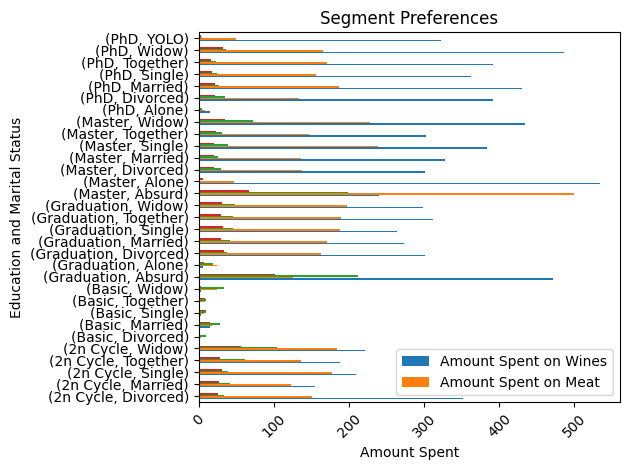

In [7]:
# Plot segment preferences
plt.figure(figsize=(10, 6))
segment_preferences.plot(kind='barh')
plt.ylabel('Education and Marital Status')
plt.xlabel('Amount Spent')
plt.title('Segment Preferences')
plt.xticks(rotation=45)
plt.legend(['Amount Spent on Wines', 'Amount Spent on Meat'])
plt.tight_layout()
plt.show()

<b>Insights</b>

Based on the insights gathered, we can optimize our marketing campaigns by considering the following strategies:
<br>

Personalization: Tailor campaigns to specific customer segments based on their demographics, preferences, and behaviors.
<br>
Channel optimization: Allocate resources to the most effective purchase channels that yield higher conversion rates or engagement.
<br>
Timing: Consider the recency of customers' last purchases and design campaigns to reach them at appropriate intervals.
<br>
Offer optimization: Offer products or incentives that align with customer preferences to increase the chances of acceptance.

Based on the acceptance rates and specific preferences, we can identify key segments manually by examining the output of acceptance rates and segment preferences.
<br>

Based on the identified key segments, we can create targeted campaigns by customizing offers, messaging, and channels to align with the preferences and behaviors of each segment.

<b>Fruits and Fish Products Preferences

In [8]:
# Analyze Fruits and Fish Products preferences within each segment
segmented_df['AmountspentFishProducts'] = df['MntFishProducts']
segmented_df['AmountspentFruits'] = df['MntFruits']

segment_preferences = segmented_df.groupby(['Education', 'Marital_Status']).agg({
    'AmountspentFishProducts':'mean',
    'AmountspentFruits':'mean'
})
print(segment_preferences)

                           AmountspentFishProducts  AmountspentFruits
Education  Marital_Status                                            
2n Cycle   Divorced                      33.217391          25.565217
           Married                       41.604938          27.469136
           Single                        39.540541          31.135135
           Together                      61.824561          28.684211
           Widow                        103.600000          55.600000
Basic      Divorced                      10.000000           1.000000
           Married                       27.950000          15.450000
           Single                         9.777778           9.166667
           Together                      10.142857           8.714286
           Widow                         34.000000           3.000000
Graduation Absurd                       212.000000         102.000000
           Alone                         19.000000           7.000000
           Divorced 

<Figure size 1000x600 with 0 Axes>

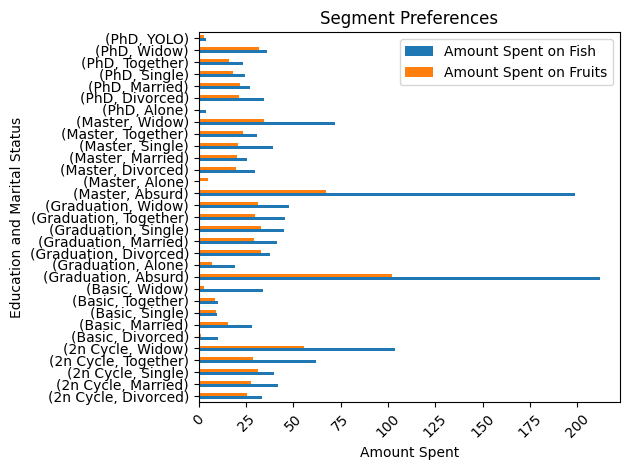

In [9]:
# Plot segment preferences
plt.figure(figsize=(10, 6))
segment_preferences.plot(kind='barh')
plt.ylabel('Education and Marital Status')
plt.xlabel('Amount Spent')
plt.title('Segment Preferences')
plt.xticks(rotation=45)
plt.legend(['Amount Spent on Fish', 'Amount Spent on Fruits'])
plt.tight_layout()
plt.show()